# Measuring Similarity Of Two Stock Charts
There are naturally countless ways one could conceive to measure the similarities and differences between two stock charts. The general process for most might look something like this:
1. Select a period, P, and divide the remaining data into periods of equal length.
2. Normalize each period.
3. Compare each period Q, to P.

A brief search will yield dozens of methods for (2) and (3). Thankfully, I asked for advice from the knowledge and expertise of someone more knowledgeable and expert than I. Their first recommendation was to look into something called _KL-Divergence_.

### KL-Divergence
To put it briefly, KL-Divergence is a measure of statistical distance between two probability distributions. In other words, if you have an event whose probabilities can be described by distribution P, then the KL-Divergence of P from Q is the measure of how well a second distribution, Q, predicts the same event as P. For example, if you were to play craps at a table with die you knew were loaded, you might try to guess what the weights are in order to win money. The actual weights are P, the weights you guess or assume through observation are Q, and then the KL-Divergence between the two represents how close your guess is (where a lower divergence implies greater accuracy).

The actual formula for KL-Divergence of a discrete distribution is actually pretty straightforward:
$$KL \left( P \right| \left| Q \right) = \sum_{x\in X}[P(x)\cdot log(\frac{P(x)}{Q(x)})] $$

Again, where P is the actual distribution and Q is the distribution you are trying to approximate. The formula is a bit more complicated for continuous distributions, but the idea is the same.

### Normalization
Because stock prices are not probabilities, we need to normalize them or _pretend they are probabilities_, in order to use KL-Divergence. Another way to think about this is that the shape of two stock charts is defined by their _relative_ (change of) values, not their _absolute_ (change of) values. For example, if a stock chart has a value of 100 at the beginning of the period, and a value of 200 at the end of the period, then the shape of the chart is the same as if the stock chart had a value of 1 at the beginning of the period and a value of 2 at the end of the period.

In [1]:
# Code to calculate KL-Divergence
import numpy as np
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0)) * 100_000

# Using KL-Divergence
Now let's test our function on a couple stock-chart timeframes!
We'll pick one period of time in the S&P 500 and compare it to other periods of time in the S&P 500.

<Axes: ylabel='CloseNormed'>

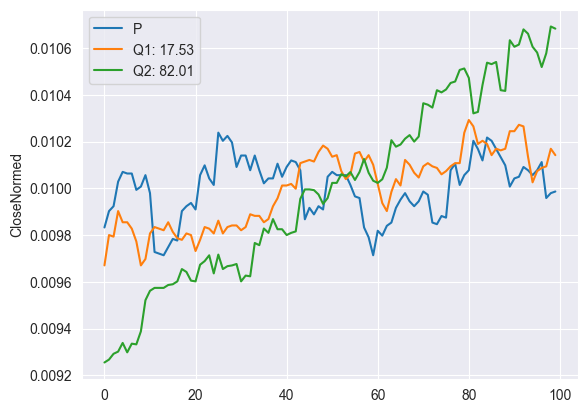

In [2]:
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None

def normalize(data):
    return data / data.sum()

spy = pd.read_csv('../data/SPY.csv')
periods = []
period1 = spy.iloc[0:100]
period2 = spy.iloc[100:200]
period3 = spy.iloc[500:600]

for period in [period1, period2, period3]:
    period["CloseNormed"] = normalize(period["Close"])
    period.reset_index(inplace=True)

sns.lineplot(period1["CloseNormed"], label='P')
sns.lineplot(period2["CloseNormed"], label=f'Q1: {kl_divergence(period1["CloseNormed"], period2["CloseNormed"]):.2f}')
sns.lineplot(period3["CloseNormed"], label=f'Q2: {kl_divergence(period1["CloseNormed"], period3["CloseNormed"]):.2f}')

As you can see, the KL-Divergence between the first period and the second period is much lower than the KL-Divergence between the first period and the third period. This makes sense because the second period is very similar to the first period, while the third period is very different from the first period.

<Axes: ylabel='Close'>

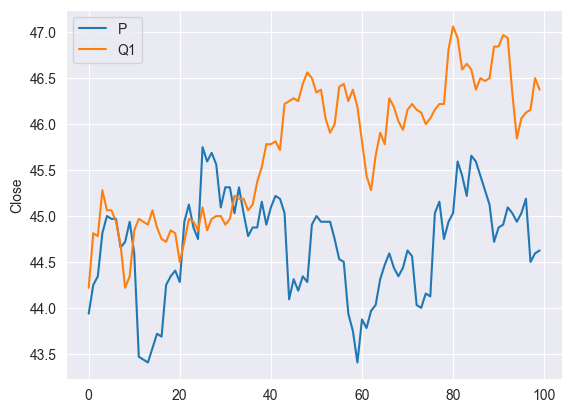

In [3]:
sns.lineplot(period1['Close'], label='P')
sns.lineplot(period2['Close'], label='Q1')

We can see that the shapes of the two periods are somewhat similar, but definitely less so than the normalized versions.
In another notebook, we'll explore using different normalization techniques to determine the best way to compare shapes in the end.